In [1]:
import pandas as pd
import numpy as np
import os, glob

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from readers import read_and_merge_paths, read_json
import seaborn as sns

from collections import defaultdict
from matplotlib.ticker import MultipleLocator, PercentFormatter

# 
from plotting_utils import *
from metrics import compute_recall, compute_error_rate, compute_doc_provenance


# Put at top of plotting script (requires tex be installed though)
matplotlib.rc('font', family='serif')

FULL_WIDTH = 6.75133
COL_WIDTH  = 3.25063

COMBINATIONS = (2, 3, 4, 5, 10)
MODELS = (
    "accounts/fireworks/models/llama-v3p1-70b-instruct",
    "gpt-4o-2024-05-13",
    "gpt-3.5-turbo-0125",
    "accounts/fireworks/models/qwen2-72b-instruct",
    "gemini-1.5-flash",
)

PROMPT_SETTING = (
    "subtopic",
)

## Load results

In this section, we load the results from the `run_final_postprocessing` step with the `--adversarial` flag, which creates a file w/ all the labels for the adversarial setting.


In [2]:
def compute_recall_adv(labels) -> pd.DataFrame:
    """Compute the recall per response id."""
    labels_by_idx = defaultdict(list)
    for label in labels:
        labels_by_idx[label["response_idx"]].append(label)
    
    results = defaultdict(list)
    for resp_uuid, pred_labels in labels_by_idx.items():        
        # Determine the number of expected relevant insights
        assert len(pred_labels) >= 1

        correct_label = [l for l in pred_labels if l["correct"]]
        
        results["response_id"].append(resp_uuid)
        results["label_type"].append("fc+pc")
        results["adversarial_type"].append(pred_labels[0]["adversarial_type"])
        results["n"].append(1)
        results["tp"].append(1 if len(correct_label) >= 1 else 0)
        results["num_preds"].append(len(pred_labels))
        results["subtopic"].append(pred_labels[0]["queried_subtopic"])
        results["preds"].append("\n".join([l["pred_text"] for l in pred_labels]))
        
    return pd.DataFrame(results)

In [186]:
metric = "adversarial"
domain = "conv"
base_dir = f"../outputs_{domain}/run_final_postprocessing-adv/results_adversarial_subtopic/subtopic"

all_recall_results = []
all_err_rate_results = []
for model in MODELS:
    for combination in COMBINATIONS:
        filepaths = sorted(glob.glob(f"{base_dir}/SummHay__combinations-{combination}/{model}/topic_{domain}*.json"))            
        for filepath in filepaths: 
            data = read_json(filepath)
            recall = compute_recall_adv(data["labels"])
            recall["fraction"] = recall["tp"] / recall["n"]
            
            for df in (recall,):
                df["summarizer_model"] = model.rpartition("/")[-1]
                df["prompt"] = "subtopic"
                df["num_documents"] = combination
                df["filepath"] = filepath.rpartition(metric + "__")[-1]
            
            all_recall_results.append(recall)

all_recall_results = pd.concat(all_recall_results)
all_recall_results["tp"].value_counts()

tp
0    3532
1    2718
Name: count, dtype: int64

In [187]:
all_recall_results.groupby(["num_documents", "summarizer_model"]).count()

response_id  label_type  \
num_documents summarizer_model                                   
2             gemini-1.5-flash                 250         250   
              gpt-3.5-turbo-0125               250         250   
              gpt-4o-2024-05-13                250         250   
              llama-v3p1-70b-instruct          250         250   
              qwen2-72b-instruct               250         250   
3             gemini-1.5-flash                 250         250   
              gpt-3.5-turbo-0125               250         250   
              gpt-4o-2024-05-13                250         250   
              llama-v3p1-70b-instruct          250         250   
              qwen2-72b-instruct               250         250   
4             gemini-1.5-flash                 250         250   
              gpt-3.5-turbo-0125               250         250   
              gpt-4o-2024-05-13                250         250   
              llama-v3p1-70b-instruct          250         250   
              qwen2-72b-instruct               250         250   
5             gemini-1.5-flash                 250         250   
              gpt-3.5-turbo-0125               250         250   
              gpt-4o-2024-05-13                250         250   
              llama-v3p1-70b-instruct          250         250   
              qwen2-72b-instruct               250         250   
10            gemini-1.5-flash                 250         250   
              gpt-3.5-turbo-0125               250         250   
              gpt-4o-2024-05-13                250         250   
              llama-v3p1-70b-instruct          250         250   
              qwen2-72b-instruct               250         250   

                                       adversarial_type    n   tp  num_preds  \
num_documents summarizer_model                                                 
2             gemini-1.5-flash                      250  250  250        250   
              gpt-3.5-turbo-0125                    250  250  250        250   
              gpt-4o-2024-05-13                     250  250  250        250   
              llama-v3p1-70b-instruct               250  250  250        250   
              qwen2-72b-instruct                    250  250  250        250   
3             gemini-1.5-flash                      250  250  250        250   
              gpt-3.5-turbo-0125                    250  250  250        250   
              gpt-4o-2024-05-13                     250  250  250        250   
              llama-v3p1-70b-instruct               250  250  250        250   
              qwen2-72b-instruct                    250  250  250        250   
4             gemini-1.5-flash                      250  250  250        250   
              gpt-3.5-turbo-0125                    250  250  250        250   
              gpt-4o-2024-05-13                     250  250  250        250   
              llama-v3p1-70b-instruct               250  250  250        250   
              qwen2-72b-instruct                    250  250  250        250   
5             gemini-1.5-flash                      250  250  250        250   
              gpt-3.5-turbo-0125                    250  250  250        250   
              gpt-4o-2024-05-13                     250  250  250        250   
              llama-v3p1-70b-instruct               250  250  250        250   
              qwen2-72b-instruct                    250  250  250        250   
10            gemini-1.5-flash                      250  250  250        250   
              gpt-3.5-turbo-0125                    250  250  250        250   
              gpt-4o-2024-05-13                     250  250  250        250   
              llama-v3p1-70b-instruct               250  250  250        250   
              qwen2-72b-instruct                    250  250  250        250   

                                       subtopic  preds  fraction  prompt  \
num_documents summa

Each file will be constitute the following keys:
- documents: all documents and their metadata.
- input_filepath: the evaluation filepath from which the labels were derived
- insights: all insights and their metadata.
- metric: the name of the metric.
- subtopics: all subtopics and their metadata.
- topics: the topic name.
- topic_id: the topic unique identifier.
- labels: the labels according to the evaluation metric. We will have one label for each predicted insight and reference insight. In cases, where the reference insight (or predicted insight) has no match, we will encounter a label `NO_COVERAGE`.
    - `coverage`: the coverage label among `PARTIAL_COVERAGE`, `FULL_COVERAGE`, and `NO_COVERAGE`.
    - `docs_uuids_ordered`: the ordered list of document uuid. The first element in this list concerns the unique identifier of the document that was placed first in the prompt.
    - `num_preds`: number of predicted insights from the model.
    - `num_refs_in_context`: total number of reference insights in the context.
    - `pred_uuid`: the unique identifier of the predicted insight.
    - `pred_text`: the text of the predicted insight
    - `pred_rank`: the rank of the predicted insight in the output. If it is 0, then it means it was the first bulletpoint in the summary.
    - `queried_subtopic`: the subtopic used to guide the summarization.
    - `queried_subtopic_uuid`: unique identifeir of the subtopic used to guide the summarization.
    - `ref_doc_attribution`: list of documents containing the reference insight. For combination of 2, this can either be [0, 1], [0], [1], or null.
    - `ref_is_queried_subtopic`: whether the reference insight belongs to the queried subtopic.
    - `ref_is_shared`: whether the reference insight is shared across 2+ documents.
    - `ref_num_shared`: number of documents containing the reference insight.
    - `ref_subtopic`: subtopic of the reference insight.
    - `ref_subtopic_uuid`: unique identifier of the subtopic of the reference insight.
    - `ref_text`: text of the reference insight.
    - `ref_uuid`: unique identifier of the reference insight.
    - `response_idx`: response identifier.


Here is an example of a label:
```
"coverage": "PARTIAL_COVERAGE",
      "docs_uuids_ordered": [
        "665693b3cfa5f926ed96ae33",
        "665693f6cfa5f926ed96ae59"
      ],
      "num_preds": 5,
      "num_refs_in_context": 5,
      "pred_rank": 4,
      "pred_text": "- The doctors acknowledged the wait times involved in seeing a specialist and informed the patients about the estimated wait time for an appointment.",
      "pred_uuid": "fa59f6894d26c34609b107f8ff2823f1",
      "queried_subtopic": "discussion about ordering or reviewing lab tests for better diagnosis",
      "queried_subtopic_uuid": "665692f3cfa5f926ed96adc0",
      "ref_doc_attribution": [
        0,
        1
      ],
      "ref_is_queried_subtopic": true,
      "ref_is_shared": true,
      "ref_num_shared": 2,
      "ref_subtopic": "doctor discussing the possibility of referring the patient to a specialist",
      "ref_subtopic_uuid": "665692f3cfa5f926ed96adc1",
      "ref_text": "The doctor discusses potential wait times for specialist appointments and mentions that it could take approximately 3-4 weeks to get an appointment with the recommended specialist.",
      "ref_uuid": "6656931dcfa5f926ed96ade9",
      "response_idx": 0
```

## Summary Statistics

Image saved in ../paper-oct/images/conv/adversarial/lineplot/num_preds_and_refs/subtopic.png


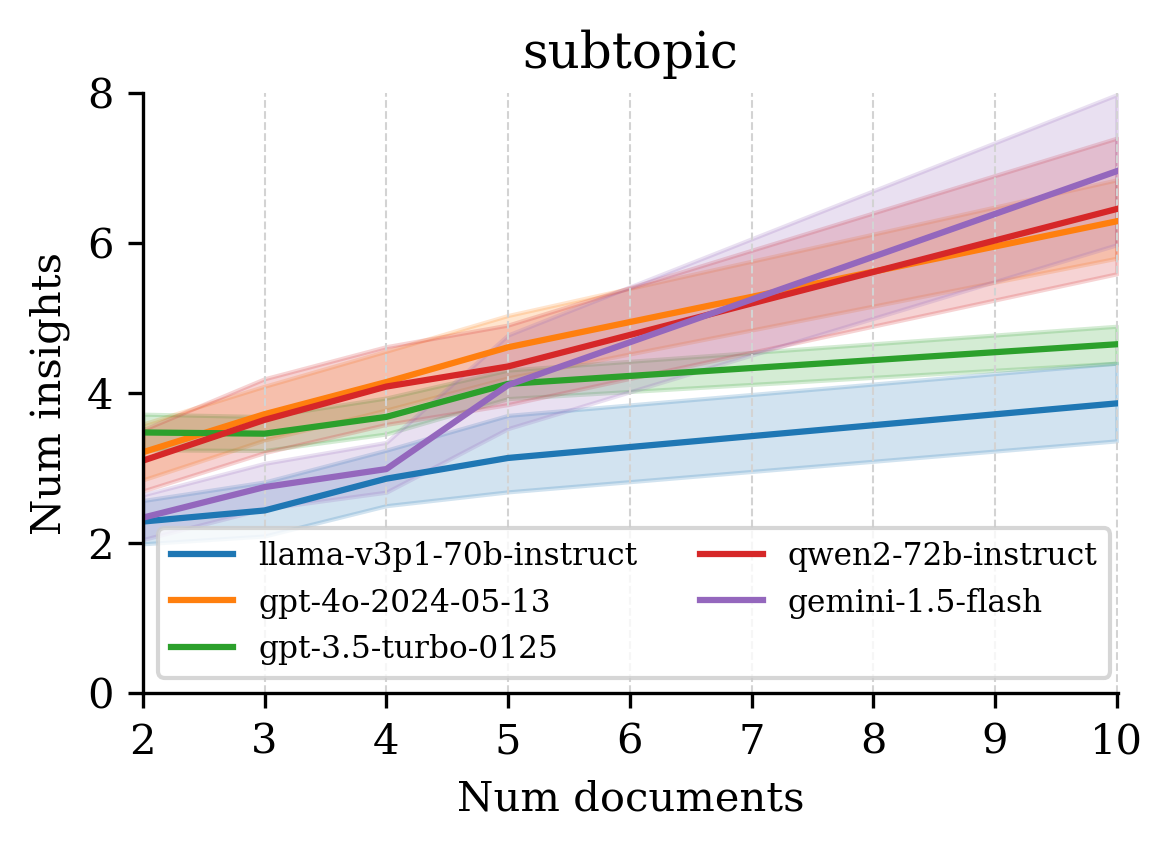

In [188]:
fig, ax = plt.subplots(1, 1, sharey=True, figsize=(COL_WIDTH, 2), dpi=300)

subset_recall = all_recall_results[
    (all_recall_results["label_type"] == "fc+pc") 
    & (all_recall_results["prompt"] == "subtopic")
]

ax.set_title(f"subtopic")
sns.lineplot(subset_recall, x="num_documents", y="num_preds", hue="summarizer_model", ax=ax)

ax.yaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.grid(axis='x', which="major", linewidth=0.5, linestyle='--', color="lightgray")

ax.set_xlabel("Num documents")
ax.set_ylabel("Num insights")

ax.set_xlim((2, 10.01))
ax.set_ylim(0, 8)
ax.legend(loc="lower left", ncols=2, bbox_to_anchor=(0.0, 0), fontsize=7.5)
remove_axes(ax)

adjust(fig, wspace=0.05)
save_fig(fig, f"{domain}/{metric}/lineplot/num_preds_and_refs/subtopic.png", dpi=300)

## Recall

In [189]:
all_recall_results.groupby(["summarizer_model", "num_documents", "prompt"]).count()

response_id  label_type  \
summarizer_model        num_documents prompt                              
gemini-1.5-flash        2             subtopic          250         250   
                        3             subtopic          250         250   
                        4             subtopic          250         250   
                        5             subtopic          250         250   
                        10            subtopic          250         250   
gpt-3.5-turbo-0125      2             subtopic          250         250   
                        3             subtopic          250         250   
                        4             subtopic          250         250   
                        5             subtopic          250         250   
                        10            subtopic          250         250   
gpt-4o-2024-05-13       2             subtopic          250         250   
                        3             subtopic          250         250   
                        4             subtopic          250         250   
                        5             subtopic          250         250   
                        10            subtopic          250         250   
llama-v3p1-70b-instruct 2             subtopic          250         250   
                        3             subtopic          250         250   
                        4             subtopic          250         250   
                        5             subtopic          250         250   
                        10            subtopic          250         250   
qwen2-72b-instruct      2             subtopic          250         250   
                        3             subtopic          250         250   
                        4             subtopic          250         250   
                        5             subtopic          250         250   
                        10            subtopic          250         250   

                                                adversarial_type    n   tp  \
summarizer_model        num_documents prompt                                 
gemini-1.5-flash        2             subtopic               250  250  250   
                        3             subtopic               250  250  250   
                        4             subtopic               250  250  250   
                        5             subtopic               250  250  250   
                        10            subtopic               250  250  250   
gpt-3.5-turbo-0125      2             subtopic               250  250  250   
                        3             subtopic               250  250  250   
                        4             subtopic               250  250  250   
                        5             subtopic               250  250  250   
                        10            subtopic               250  250  250   
gpt-4o-2024-05-13       2             subtopic               250  250  250   
                        3             subtopic               250  250  250   
                        4             subtopic               250  250  250   
                        5             subtopic               250  250  250   
                        10            subtopic               250  250  250   
llama-v3p1-70b-instruct 2             subtopic               250  250  250   
                        3             subtopic               250  250  250   
                        4             subtopic               250  250  250   
                        5             subtopic               250  250  250   
                        10            subtopic               250  250  250   
qwen2-72b-instruct      2             subtopic               250  250  250   
                        3             subtopic               250  250  250   
                        4             subtopic               250  250  250   
                        5             subtopic               250  250  2

In [190]:
all_recall_results[["summarizer_model", "fraction"]].groupby("summarizer_model").mean()

,fraction
summarizer_model,
gemini-1.5-flash,0.4864
gpt-3.5-turbo-0125,0.2064
gpt-4o-2024-05-13,0.3240
llama-v3p1-70b-instruct,0.6288
qwen2-72b-instruct,0.5288


#### Subtopic Recall Plots

Image saved in ../paper-oct/images/conv/adversarial/lineplot/recall/subtopic__fc+pc__empty_frame.png


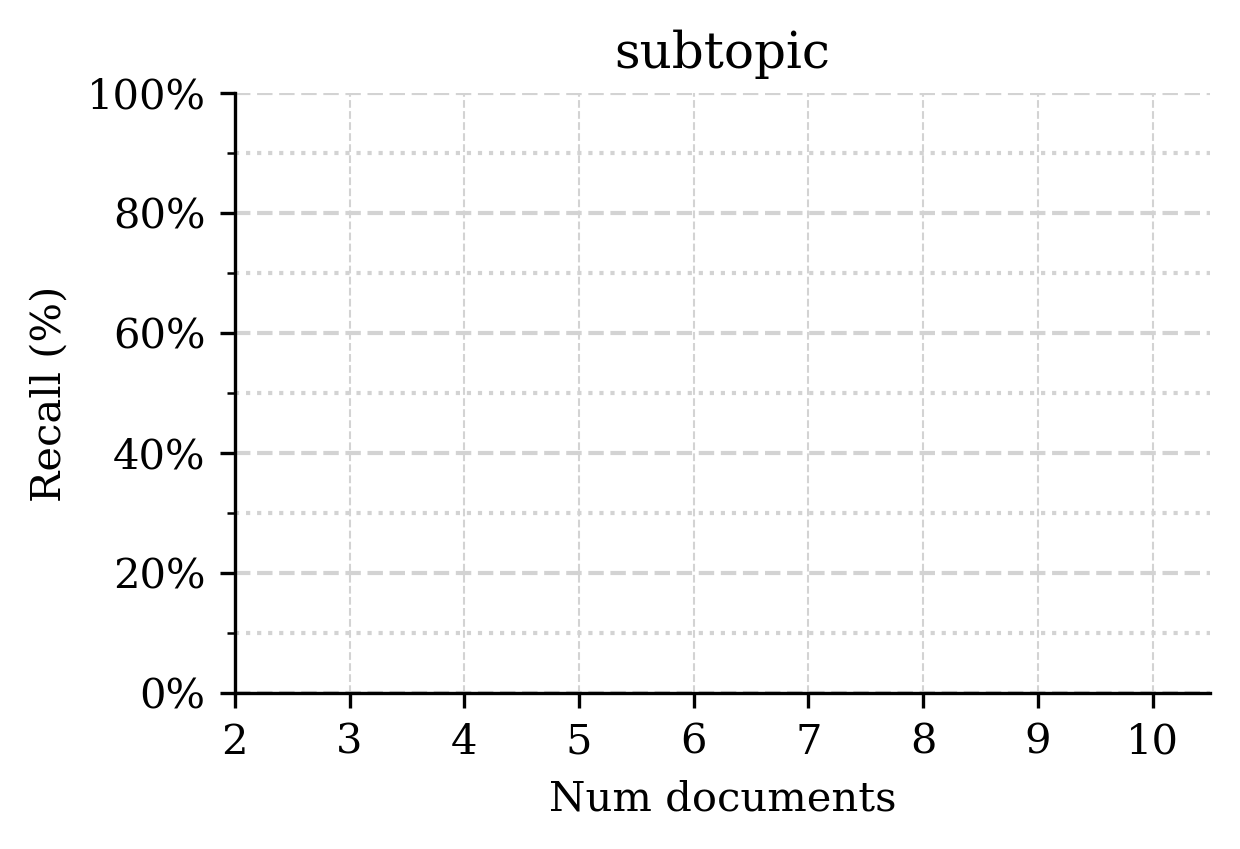

In [191]:
fig, ax = plt.subplots(1, 1, figsize=(COL_WIDTH, 2), dpi=300)
subset = all_recall_results[
    (all_recall_results["label_type"] == "fc+pc")
    & (all_recall_results["summarizer_model"] == "llamaa-v3p1-70b-instruct")
    & (all_recall_results["prompt"] == "subtopic")
]
ax.set_title(f"subtopic")
sns.lineplot(subset, x="num_documents", y="fraction", hue="summarizer_model")

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.10))
ax.yaxis.set_major_locator(MultipleLocator(0.20))
ax.yaxis.set_major_formatter(PercentFormatter(1.0))


ax.grid(axis='x', which="major", linewidth=0.5, linestyle='--', color="lightgray")
ax.grid(axis='y', which="major", linewidth=1, linestyle='--', color="lightgray")
ax.grid(axis='y', which="minor", linewidth=1, linestyle=':', color="lightgray")

ax.set_xlabel("Num documents")
ax.set_ylabel("Recall (%)")

ax.set_ylim((0.0, 1))
ax.set_xlim((2, 10.5))

remove_axes(ax)
adjust(fig)
save_fig(fig, f"{domain}/{metric}/lineplot/recall/subtopic__fc+pc__empty_frame.png", dpi=300)

Image saved in ../paper-oct/images/conv/adversarial/lineplot/recall/subtopic__fc+pc__llama3.1.png


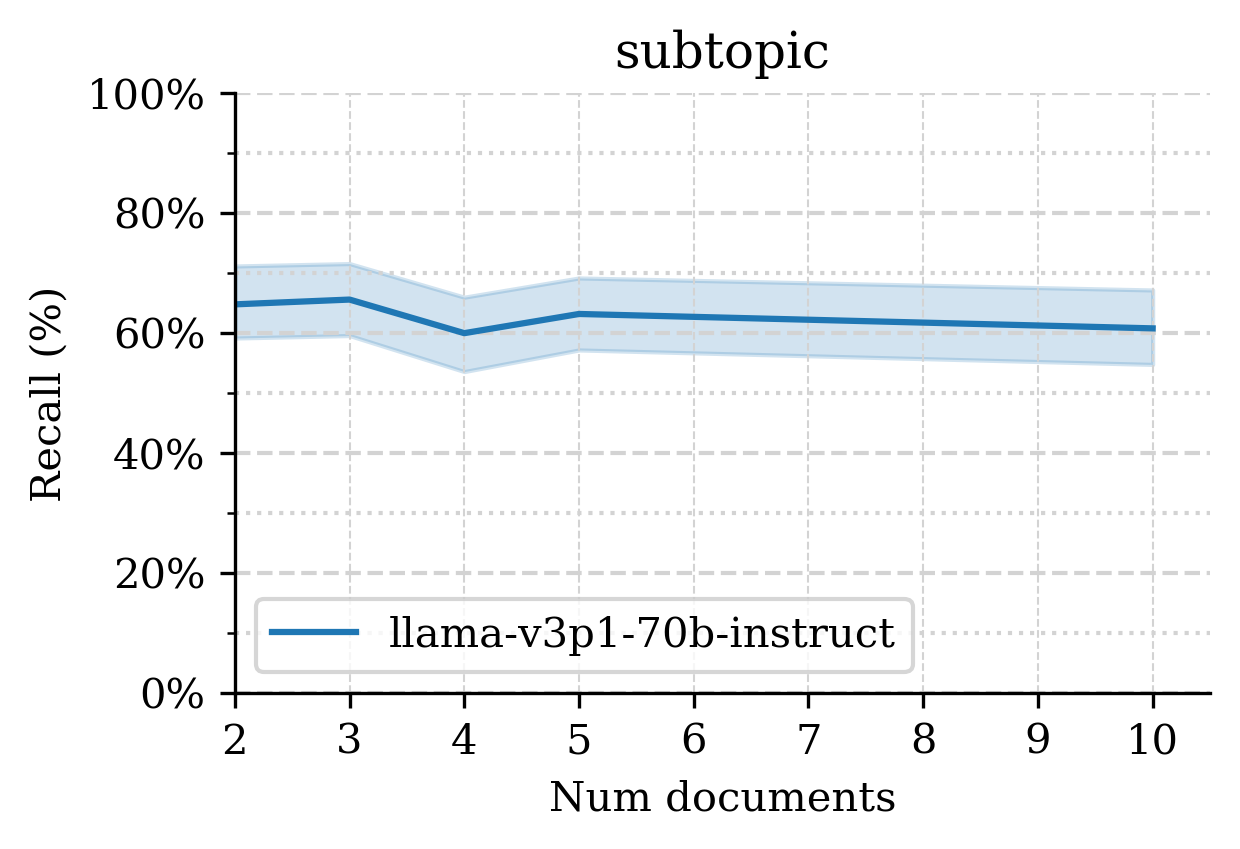

In [192]:
fig, ax = plt.subplots(1, 1, figsize=(COL_WIDTH, 2), dpi=300)
subset = all_recall_results[
    (all_recall_results["label_type"] == "fc+pc")
    & (all_recall_results["summarizer_model"] == "llama-v3p1-70b-instruct")
    & (all_recall_results["prompt"] == "subtopic")
]
ax.set_title(f"subtopic")
sns.lineplot(subset, x="num_documents", y="fraction", hue="summarizer_model")

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.10))
ax.yaxis.set_major_locator(MultipleLocator(0.20))
ax.yaxis.set_major_formatter(PercentFormatter(1.0))


ax.grid(axis='x', which="major", linewidth=0.5, linestyle='--', color="lightgray")
ax.grid(axis='y', which="major", linewidth=1, linestyle='--', color="lightgray")
ax.grid(axis='y', which="minor", linewidth=1, linestyle=':', color="lightgray")


ax.set_xlabel("Num documents")
ax.set_ylabel("Recall (%)")

ax.set_ylim((0.0, 1))
ax.set_xlim((2, 10.5))

remove_axes(ax)
adjust(fig)
ax.legend(loc="lower left", ncols=1, bbox_to_anchor=(0.0, 0.0), fontsize=10)
save_fig(fig, f"{domain}/{metric}/lineplot/recall/subtopic__fc+pc__llama3.1.png", dpi=300)

Image saved in ../paper-oct/images/conv/adversarial/lineplot/recall/conv__subtopic__fc+pc__all_models.png


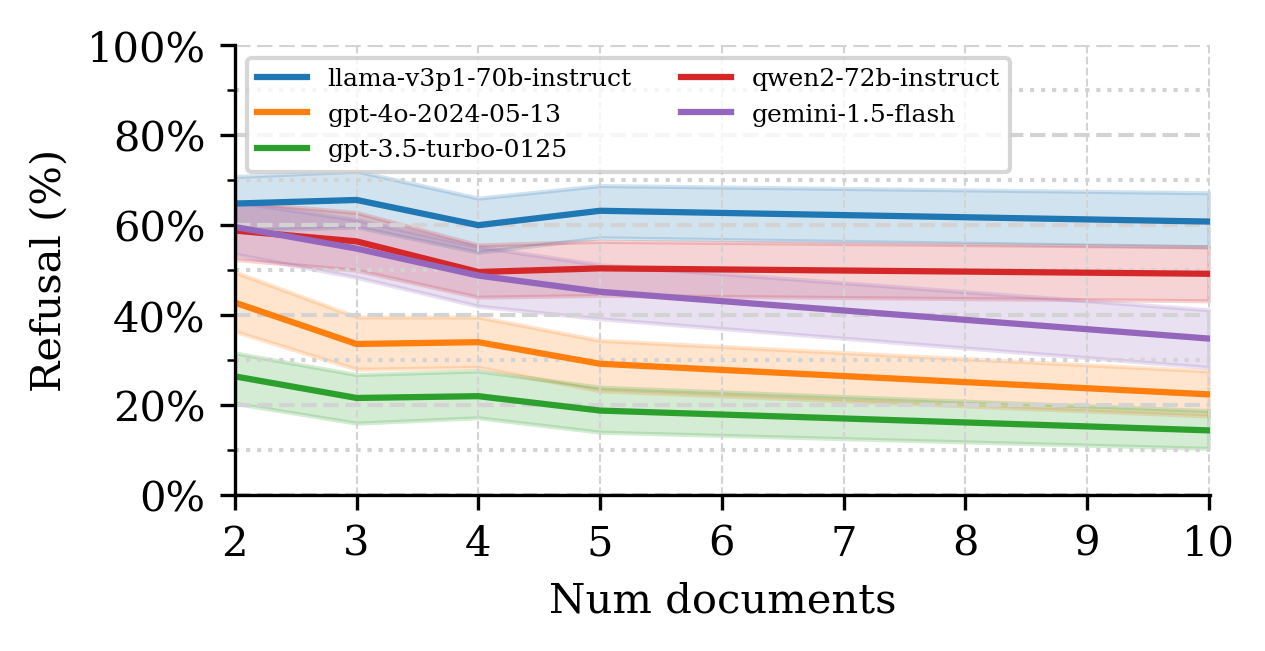

In [193]:
fig, ax = plt.subplots(1, 1, figsize=(COL_WIDTH, 1.5), dpi=300)

subset = all_recall_results[
    (all_recall_results["label_type"] == "fc+pc")
    & (all_recall_results["prompt"] == "subtopic")
]

#ax.set_title(f"[{domain}] subtopic")
sns.lineplot(subset, x="num_documents", y="fraction", hue="summarizer_model")

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.10))
ax.yaxis.set_major_locator(MultipleLocator(0.20))
ax.yaxis.set_major_formatter(PercentFormatter(1.0))


ax.grid(axis='x', which="major", linewidth=0.5, linestyle='--', color="lightgray")
ax.grid(axis='y', which="major", linewidth=1, linestyle='--', color="lightgray")
ax.grid(axis='y', which="minor", linewidth=1, linestyle=':', color="lightgray")


ax.set_ylabel("Refusal (%)")

ax.set_ylim((0.0, 1))
ax.set_xlim((2, 10.01))

if domain == "news":
    ax.get_legend().remove()
    ax.set_xlabel(None)
else:
    ax.legend(loc="upper left", ncols=2, bbox_to_anchor=(0.0, 1.0), fontsize=6)
    ax.set_xlabel("Num documents")


remove_axes(ax)
adjust(fig)
save_fig(fig, f"{domain}/{metric}/lineplot/recall/{domain}__subtopic__fc+pc__all_models.png", dpi=400)

In [194]:
print(domain)

subset = all_recall_results[
    (all_recall_results["label_type"] == "fc+pc")
    & (all_recall_results["prompt"] == "subtopic")
]
_err_subset = subset[["num_documents","summarizer_model","fraction"]].groupby(["num_documents","summarizer_model"]).mean().reset_index()
# _err_subset = _err_subset["summarizer_model"] != 'gpt-3.5-turbo-0125']
_err_subset["fraction"] = _err_subset["fraction"].apply(lambda x: x * 100)
_err_subset_2 = _err_subset[_err_subset["num_documents"] == 2].set_index("summarizer_model").rename({"fraction": "fraction_baseline"}, axis=1).drop("num_documents", axis=1)
_err_subset_all = _err_subset.set_index("summarizer_model")
_err_subset_all = _err_subset_all.join(_err_subset_2, how="left").reset_index()
_err_subset_all["drop"] = _err_subset_all["fraction"] - _err_subset_all["fraction_baseline"]
_err_subset_all[["summarizer_model", "num_documents", "drop"]].groupby(["summarizer_model", "num_documents"]).mean()

conv


drop
summarizer_model        num_documents      
gemini-1.5-flash        2               0.0
                        3              -4.8
                        4             -10.8
                        5             -14.4
                        10            -24.8
gpt-3.5-turbo-0125      2               0.0
                        3              -4.8
                        4              -4.4
                        5              -7.6
                        10            -12.0
gpt-4o-2024-05-13       2               0.0
                        3              -9.2
                        4              -8.8
                        5             -13.6
                        10            -20.4
llama-v3p1-70b-instruct 2               0.0
                        3               0.8
                        4              -4.8
                        5              -1.6
                        10             -4.0
qwen2-72b-instruct      2               0.0
                        3              -2.4
                        4              -9.2
                        5              -8.4
                        10             -9.6

In [195]:
_err_subset_all[["num_documents", "drop"]].groupby("num_documents").mean()

,drop
num_documents,
2,0.00
3,-4.08
4,-7.60
5,-9.12
10,-14.16


In [205]:
(_err_subset_all[_err_subset_all["num_documents"] > 2])[["summarizer_model", "drop"]].groupby("summarizer_model").mean()

,drop
summarizer_model,
gemini-1.5-flash,-13.7
gpt-3.5-turbo-0125,-7.2
gpt-4o-2024-05-13,-13.0
llama-v3p1-70b-instruct,-2.4
qwen2-72b-instruct,-7.4


In [196]:
subset = all_recall_results[
    (all_recall_results["label_type"] == "fc+pc")
    & (all_recall_results["prompt"] == "subtopic")
]
subset[["summarizer_model", "fraction"]].groupby("summarizer_model").mean()

,fraction
summarizer_model,
gemini-1.5-flash,0.4864
gpt-3.5-turbo-0125,0.2064
gpt-4o-2024-05-13,0.3240
llama-v3p1-70b-instruct,0.6288
qwen2-72b-instruct,0.5288


In [197]:
0.560000 - 0.710833, 0.340833 - 0.710833

(-0.150833, -0.37000000000000005)

In [198]:
subset.fraction.unique()

array([0., 1.])

In [199]:
combinations = 10
samples = 10

subset = all_recall_results[all_recall_results["num_documents"] == combinations]
subset = subset.drop(["label_type", "adversarial_type", "prompt", "num_documents"], axis=1)
subset = subset[subset["tp"] == 0]

for model in MODELS:
    print("\n\n\n\n", "*" * 80, f"\n MODEL: {model}\n", "*" * 80)
    subset_model = subset[subset["summarizer_model"] == model.rpartition("/")[-1]].copy()
    subset_model = subset_model.sample(n=min(samples, len(subset_model)), replace=False, random_state=19823)
    
    for _, wrong_answer in subset_model.iterrows():
        print("\n")
        print("=" * 30, "SUBTOPIC", "="*30)
        print(" -", wrong_answer["subtopic"])
        print("-" * 80)
        print("Preds:", wrong_answer["preds"][:200])





 ******************************************************************************** 
 MODEL: accounts/fireworks/models/llama-v3p1-70b-instruct
 ********************************************************************************


============================== SUBTOPIC ==============================
 - team members providing a detailed update on the current progress of the project
--------------------------------------------------------------------------------
Preds: - Team member 1 provided a detailed update on the current progress of the project, highlighting that they have made significant progress on the user interface design and incorporating feedback from th


============================== SUBTOPIC ==============================
 - examining how remote work affects employees' work-life balance
--------------------------------------------------------------------------------
Preds: - Remote work allows employees to have a more flexible work schedule, which can positively impact the

In [184]:
combinations = 10
samples = 10

model = "gpt-4o-2024-05-13"

subset = all_recall_results# [all_recall_results["num_documents"] == combinations]
subset = subset.drop(["label_type", "adversarial_type", "prompt", "num_documents"], axis=1)
subset = subset[subset["tp"] == 0]

print("\n\n\n\n", "*" * 80, f"\n MODEL: {model}\n", "*" * 80)
subset_model = subset[subset["summarizer_model"] == model.rpartition("/")[-1]].copy()
# subset_model = subset_model.sample(n=min(samples, len(subset_model)), replace=False, random_state=19823)

for _, wrong_answer in subset_model.iterrows():
    print("\n")
    print("=" * 30, "SUBTOPIC", "="*30)
    print(" -", wrong_answer["subtopic"])
    print("-" * 80)
    print("Preds:", wrong_answer["preds"][:200])





 ******************************************************************************** 
 MODEL: gpt-4o-2024-05-13
 ********************************************************************************


============================== SUBTOPIC ==============================
 - Branding strategies and marketing themes for the Demon 170
--------------------------------------------------------------------------------
Preds: - The Demon 170's limited production run of 3,300 units for the U.S. and Canada emphasizes exclusivity.
- Dodge offers extensive customization options, including personalized VINs for repeat buyers, a


============================== SUBTOPIC ==============================
 - Optional features and customization available for the vehicle
--------------------------------------------------------------------------------
Preds: - Dodge requires buyers of the Demon 170 to purchase a parachute kit from Direct Connection to comply with NHRA safety requirements.
- Every unit of the De

In [185]:
subset_model["preds"].value_counts()

preds
- The Demon 170's limited production run of 3,300 units for the U.S. and Canada emphasizes exclusivity.\n- Dodge offers extensive customization options, including personalized VINs for repeat buyers, adding sentimental value and encouraging brand loyalty.\n- Optional features like a premium leather interior and an Alcantara-wrapped steering wheel enhance the luxury appeal of the Demon 170.\n- Marketing focuses on the Demon 170's high performance and exclusive nature, aligning with Dodge's history of innovation and quality.\n- The urgency of the production timeline adds excitement and urgency, appealing to collectors and enthusiasts.\n- The connection to Dodge's legacy and history, including references to iconic past models like the 2018 Demon, strengthens the brand's nostalgic appeal.                                                                                                                                                                                                       